# Goal:
###### The Credit team want you to create cohort repayment curves for NASE portfolio. 
###### A cohort is a subset of customers who were all registered in the same month. A Cohort Repayment Curve is 
###### the cumulative percentage paid of the total cohort value at each month since registration (months on books). 
###### They want to filter these cohort curves by Product and Region
###### A Cohort Repayment Curves show the percentage paid of the cohort TotalValue by the months on books. 

# Load Libraries

In [1]:
import numpy as np #bring in numpy
import pandas as pd #bring in pandas
from pandas import DataFrame,Series #bring in dataframe and Series

#for visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


# Load and Explore our data

In [2]:
import os
from pathlib import Path
print(Path.cwd()) #show current directory
print(os.listdir()) #list the directory
current_dir=Path.cwd() #assignning the directory

c:\Users\HP\Desktop\Data Analysis Proj\Cohort Analysis 1
['.venv', 'cohort.ipynb', 'data_source', 'requirements.txt']


In [3]:
current=Path(current_dir)
new_path=current/"data_source"

new_path
os.chdir(new_path)

(os.listdir())

['Account.csv', 'Customer.csv', 'Payment.csv', 'PaymentPlan.csv']

In [4]:
new_path

WindowsPath('c:/Users/HP/Desktop/Data Analysis Proj/Cohort Analysis 1/data_source')

### function to Load data

In [5]:
from pathlib import Path

dicts={} #creates a dictionary


def load_csv_files(directory):
    files=list(directory.glob("*.csv")) #searches in the directory for any csv file
    if len(files)==0: #if none is available return no file based on the lenght of the file
        return('no file')
    
    for file in files:# if there is a file, i want the stem or last name of the file
        df_name=Path(file).stem #use the name as the key to the dict
        dicts[df_name]=pd.read_csv(file) #append the dictionatry


directory=Path('c:/Users/HP/Desktop/Data Analysis Proj/Cohort Analysis 1/data_source') #load directory
load_csv_files(directory)

In [6]:
df_Account=dicts['Account']
df_Customer=dicts['Customer']
df_Payment=dicts['Payment']
df_PaymentPlan=dicts['PaymentPlan']

In [7]:
df_Account.head()

,AccountId,RegistrationDate,CustomerId,PaymentPlanId
0,5000,2020-03-30,4720,63
1,5002,2020-06-06,2674,63
2,5003,2020-02-28,2495,69
3,5007,2020-02-20,1749,37
4,5010,2020-09-03,2905,20


In [8]:
df_Customer.head()

,CustomerId,FirstName,LastName,Region
0,1000,Obinna,Mbori,mombasa
1,1003,Frank,Nyakwea,kisumu
2,1004,Victor,Nyakwea,nairobi
3,1005,Brian,Mbori,kisumu
4,1006,Mercy,Muguku,kisumu


In [9]:
df_Payment[df_Payment['AccountId']==5000]

,PaymentId,Amount,ReceivedWhen,AccountId,PaymentType
308,1636,28.475379,2020-04-11,5000,DailyPayment
2503,5982,28.475379,2020-04-10,5000,DailyPayment
2959,6872,28.475379,2020-09-25,5000,DailyPayment
4872,10731,28.475379,2020-07-13,5000,DailyPayment
5042,11085,28.475379,2020-09-08,5000,DailyPayment
...,...,...,...,...,...
225704,452380,28.475379,2020-11-15,5000,DailyPayment
226379,453754,28.475379,2020-06-30,5000,DailyPayment
227168,455326,28.475379,2020-10-24,5000,DailyPayment
228639,458293,28.475379,2020-08-15,5000,DailyPayment


In [10]:
df_PaymentPlan.head()

,PaymentPlanId,Product,DailyValue,LoanTerm,Deposit,TotalValue
0,10,tv,75,200,1125,16125
1,11,phone,35,150,175,5425
2,12,phone,25,300,500,8000
3,13,solar,45,200,1125,10125
4,15,solar,50,200,1250,11250


# EDA
###### We are going to explore the data and summarize our findings
###### Also we will join some tables and and explore well


In [11]:
## let's join df_Account and df_Customer
## but lets make sure there is no null value

df_Account.isna().sum()
df_Customer.isna().sum()



CustomerId    0
FirstName     0
LastName      0
Region        0
dtype: int64

In [12]:
df_Customer.head()

,CustomerId,FirstName,LastName,Region
0,1000,Obinna,Mbori,mombasa
1,1003,Frank,Nyakwea,kisumu
2,1004,Victor,Nyakwea,nairobi
3,1005,Brian,Mbori,kisumu
4,1006,Mercy,Muguku,kisumu


In [13]:
df_Customer['FullName']=df_Customer['FirstName']+' '+df_Customer['LastName']

In [14]:
df_Customer.head()

,CustomerId,FirstName,LastName,Region,FullName
0,1000,Obinna,Mbori,mombasa,Obinna Mbori
1,1003,Frank,Nyakwea,kisumu,Frank Nyakwea
2,1004,Victor,Nyakwea,nairobi,Victor Nyakwea
3,1005,Brian,Mbori,kisumu,Brian Mbori
4,1006,Mercy,Muguku,kisumu,Mercy Muguku


In [15]:
df_Account_upd=df_Account.merge(df_Customer[['CustomerId','FullName','Region']],how='left',on='CustomerId')

We have no null value in account and Customer data hence we go ahead and join Account and Customer together

In [16]:
df_Account_upd.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountId,2000.0,6979.2830,1160.845924,5000.0,5974.75,6972.5,7973.25,8999.0
CustomerId,2000.0,2982.5785,1148.129501,1000.0,1988.75,3004.0,3958.00,4998.0
PaymentPlanId,2000.0,38.1145,18.503475,10.0,20.00,38.0,53.00,69.0


In [17]:
df_Account_upd.info()

df_Account_upd['RegistrationDate']=pd.to_datetime(df_Account_upd['RegistrationDate'],format='%Y-%m-%d')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AccountId         2000 non-null   int64 
 1   RegistrationDate  2000 non-null   object
 2   CustomerId        2000 non-null   int64 
 3   PaymentPlanId     2000 non-null   int64 
 4   FullName          2000 non-null   object
 5   Region            2000 non-null   object
dtypes: int64(3), object(3)
memory usage: 93.9+ KB


In [18]:
df_Account_upd['Month']=df_Account_upd['RegistrationDate'].dt.month
df_Account_upd['Year']=df_Account_upd['RegistrationDate'].dt.year

In [19]:
df_Account_upd=df_Account_upd.merge(df_PaymentPlan[['PaymentPlanId','Product','Deposit','TotalValue']],how='left',on='PaymentPlanId')

In [20]:
df_Account_upd.head()

,AccountId,RegistrationDate,CustomerId,PaymentPlanId,FullName,Region,Month,Year,Product,Deposit,TotalValue
0,5000,2020-03-30,4720,63,Michael Mbori,nairobi,3,2020,phone,250,7750
1,5002,2020-06-06,2674,63,Titus Mbori,kisumu,6,2020,phone,250,7750
2,5003,2020-02-28,2495,69,Mercy Warimu,mombasa,2,2020,tv,1375,23375
3,5007,2020-02-20,1749,37,Frank Lwoyelo,mombasa,2,2020,solar,675,9675
4,5010,2020-09-03,2905,20,Titus Mbori,nairobi,9,2020,solar,1625,27625


In [21]:
## This will help no the number of customers onboarded  monthly

sum_acc=df_Account_upd.groupby(['Month']).agg({'AccountId': 'count'}).reset_index()
fig=px.line(data_frame=sum_acc,x='Month',y='AccountId',text='AccountId')
fig.update_traces(textposition="top center", textfont_size=12)
fig.update_layout(
    title="Monthly Account ID Trends",
    xaxis_title='Month',
    yaxis_title='Number of Accounts',
    title_x=0.5

)
fig.show()

#### August recorded the highest number of customers onboarded

In [22]:
df_Account_upd.head()## This will help no the number of customers onboarded  monthly

sum_prod=df_Account_upd.groupby(['Product','Month']).agg({'AccountId': 'count'}).reset_index()

sum_prod_pivot=sum_prod.pivot(index='Product',columns='Month',values='AccountId')

sum_prod_pivot.columns.name=None

sum_prod_pivot=sum_prod_pivot.reset_index()

fig=px.bar(sum_prod,x='Month',y='AccountId',color='Product',barmode='group',title='Product Distribution per Month')
fig.update_layout(
    title="Monthly Product Trends",
    xaxis_title='Month',
    yaxis_title='Count of Products',
    title_x=0.5

)


In [23]:
sum_prod_pivot

,Product,1,2,3,4,5,6,7,8,9,10,11,12
0,phone,54,52,58,49,61,61,59,50,59,49,55,53
1,solar,55,37,45,45,60,48,50,68,52,58,61,68
2,tv,57,48,65,51,55,49,46,73,70,71,47,61


In [24]:
#sum_prod_pivot['Total']=sum_prod_pivot.iloc[:,1:].sum(axis=1)



In [25]:
max_values=sum_prod_pivot.iloc[:,1:].max(axis=0)

max_products=sum_prod_pivot.iloc[:,1:].idxmax(axis=0).apply(lambda x:sum_prod_pivot.loc[x,'Product'])

max_df=DataFrame({
    "Max_Value":max_values,
    "Product":max_products
})

In [26]:
sum_prod_pivot

,Product,1,2,3,4,5,6,7,8,9,10,11,12
0,phone,54,52,58,49,61,61,59,50,59,49,55,53
1,solar,55,37,45,45,60,48,50,68,52,58,61,68
2,tv,57,48,65,51,55,49,46,73,70,71,47,61


In [27]:
max_df=max_df.reset_index().rename(columns={'index':'Months'})


In [28]:
max_df

fig=px.bar(max_df,x='Months',y='Max_Value',color='Product',title='Best Product per Month')
fig.update_layout(
    title="Best Product Per Monthly",
    xaxis_title='Month',
    yaxis_title='Count of Products',
    title_x=0.5

)

In [29]:
max_df

,Months,Max_Value,Product
0,1,57,tv
1,2,52,phone
2,3,65,tv
3,4,51,tv
4,5,61,phone
5,6,61,phone
6,7,59,phone
7,8,73,tv
8,9,70,tv
9,10,71,tv


In [30]:
sum_prod_pivot

,Product,1,2,3,4,5,6,7,8,9,10,11,12
0,phone,54,52,58,49,61,61,59,50,59,49,55,53
1,solar,55,37,45,45,60,48,50,68,52,58,61,68
2,tv,57,48,65,51,55,49,46,73,70,71,47,61


TV was our best product in the year, it was our highest performing product for 6 months 

In [31]:
df_Account_upd[df_Account_upd['AccountId']==6717]

,AccountId,RegistrationDate,CustomerId,PaymentPlanId,FullName,Region,Month,Year,Product,Deposit,TotalValue
866,6717,2020-06-07,1261,44,Victor Nyakwea,nairobi,6,2020,tv,1100,17600


In [32]:
df_Payment[df_Payment['AccountId']==6717]

,PaymentId,Amount,ReceivedWhen,AccountId,PaymentType
0,1000,125.960784,2020-09-13,6717,DailyPayment
4863,10715,125.960784,2020-09-25,6717,DailyPayment
4931,10850,125.960784,2021-03-18,6717,DailyPayment
5642,12360,125.960784,2020-06-14,6717,DailyPayment
5701,12501,125.960784,2020-07-28,6717,DailyPayment
...,...,...,...,...,...
224284,449526,125.960784,2020-07-04,6717,DailyPayment
224334,449631,125.960784,2020-08-29,6717,DailyPayment
230786,462542,125.960784,2020-11-13,6717,DailyPayment
231123,463226,125.960784,2020-11-27,6717,DailyPayment


## Regional Break Down

In [33]:
df_Account_upd

,AccountId,RegistrationDate,CustomerId,PaymentPlanId,FullName,Region,Month,Year,Product,Deposit,TotalValue
0,5000,2020-03-30,4720,63,Michael Mbori,nairobi,3,2020,phone,250,7750
1,5002,2020-06-06,2674,63,Titus Mbori,kisumu,6,2020,phone,250,7750
2,5003,2020-02-28,2495,69,Mercy Warimu,mombasa,2,2020,tv,1375,23375
3,5007,2020-02-20,1749,37,Frank Lwoyelo,mombasa,2,2020,solar,675,9675
4,5010,2020-09-03,2905,20,Titus Mbori,nairobi,9,2020,solar,1625,27625
...,...,...,...,...,...,...,...,...,...,...,...
1995,8991,2020-04-06,3149,46,Mercy Warimu,mombasa,4,2020,tv,1125,23625
1996,8993,2020-10-14,4106,44,Nancy Warimu,nairobi,10,2020,tv,1100,17600
1997,8994,2020-04-23,2127,51,Frank Lwoyelo,nairobi,4,2020,tv,975,13975
1998,8996,2020-06-26,3162,49,Dorcas Chocho,nairobi,6,2020,solar,900,18900


In [34]:
df_Account_upd.groupby(['Region']).agg({'AccountId':'count'}).reset_index()

,Region,AccountId
0,kisumu,667
1,mombasa,666
2,nairobi,667


Customers accross region is well distributed across various regions

In [35]:
Reg_summ=df_Account_upd.groupby(['Region','Month']).agg({'AccountId': 'count'}).reset_index()


fig=px.line(Reg_summ,x='Month',y='AccountId',color='Region',title='Customer Regional per Month')
fig.update_layout(
    title="Customer Regional per Month",
    xaxis_title='Month',
    yaxis_title='Count of Customers',
    title_x=0.5

)

In [36]:
Reg_summ_prod=df_Account_upd.groupby(['Region','Month','Product']).agg({'AccountId': 'count'}).reset_index()


Reg_summ_prod['Region_Product']=Reg_summ_prod['Region']+"-"+Reg_summ_prod['Product']

In [37]:



fig=px.line(Reg_summ_prod,x='Month',y='AccountId',color='Region_Product',title='Customer Regional per Month')
fig.update_layout(
    title="Regional Product Trend",
    xaxis_title='Month',
    yaxis_title='Count of Products Purchased',
    title_x=0.5

)

In [38]:
df_Account_upd.head()

,AccountId,RegistrationDate,CustomerId,PaymentPlanId,FullName,Region,Month,Year,Product,Deposit,TotalValue
0,5000,2020-03-30,4720,63,Michael Mbori,nairobi,3,2020,phone,250,7750
1,5002,2020-06-06,2674,63,Titus Mbori,kisumu,6,2020,phone,250,7750
2,5003,2020-02-28,2495,69,Mercy Warimu,mombasa,2,2020,tv,1375,23375
3,5007,2020-02-20,1749,37,Frank Lwoyelo,mombasa,2,2020,solar,675,9675
4,5010,2020-09-03,2905,20,Titus Mbori,nairobi,9,2020,solar,1625,27625


## Payment Analysis

##### 1. which region pays more of their loan
##### 2. on a monthly basis which region pays more of its loan
##### 3. Payment trend per product
##### 4. Month on Month trend per product (payment)
##### 5. Join account table with payment for next cohort analysis

In [39]:
## Ans to question 1
## check if there are null values and check the data type of the table

df_Payment.info()
df_Payment.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234553 entries, 0 to 234552
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   PaymentId     234553 non-null  int64  
 1   Amount        234553 non-null  float64
 2   ReceivedWhen  234553 non-null  object 
 3   AccountId     234553 non-null  int64  
 4   PaymentType   234553 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 8.9+ MB


,count,mean,std,min,25%,50%,75%,max
PaymentId,234553.0,235761.953094,135361.990308,1000.000000,118553.000000,235667.0,352901.000000,470104.000000
Amount,234553.0,100.588750,174.219636,23.289141,56.847335,81.9,116.216284,4702.646684
AccountId,234553.0,6954.737113,1163.332016,5000.000000,5949.000000,6925.0,7952.000000,8999.000000


In [40]:
#convert Recveived when to datetime

df_Payment['ReceivedWhen']=pd.to_datetime(df_Payment['ReceivedWhen'],format='%Y-%m-%d')
df_Payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234553 entries, 0 to 234552
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   PaymentId     234553 non-null  int64         
 1   Amount        234553 non-null  float64       
 2   ReceivedWhen  234553 non-null  datetime64[ns]
 3   AccountId     234553 non-null  int64         
 4   PaymentType   234553 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 8.9+ MB


In [41]:
##add month of payment
##day of payment

df_Payment['Payment_Month']=df_Payment['ReceivedWhen'].dt.month

In [42]:
df_Payment['Weekday']=df_Payment['ReceivedWhen'].dt.day_name().str[:3]

In [43]:
df_Payment['Year']=df_Payment['ReceivedWhen'].dt.year

In [44]:
df_Payment=df_Payment.merge(df_Account_upd[['AccountId','Region']],how='left',on='AccountId')

In [45]:
df_Payment.groupby(['Region']).agg({'Amount':'sum'}).sort_values(by='Amount',ascending=False)

,Amount
Region,
kisumu,7.941605e+06
mombasa,7.876173e+06
nairobi,7.775615e+06


## Q1. Customers from Kisimu are paying more than any Region

In [46]:
df_Payment.head()

,PaymentId,Amount,ReceivedWhen,AccountId,PaymentType,Payment_Month,Weekday,Year,Region
0,1000,125.960784,2020-09-13,6717,DailyPayment,9,Sun,2020,nairobi
1,1001,87.661685,2020-02-01,8804,DailyPayment,2,Sat,2020,nairobi
2,1009,61.505239,2021-01-15,5735,DailyPayment,1,Fri,2021,nairobi
3,1013,131.917558,2021-07-12,6837,DailyPayment,7,Mon,2021,kisumu
4,1017,100.770597,2020-09-24,5457,DailyPayment,9,Thu,2020,mombasa


In [47]:
MoM_Payment_Region=df_Payment.groupby(['Region','Payment_Month']).agg({'Amount':'sum'}).sort_values(by='Amount',ascending=False).reset_index()

fig=px.bar(MoM_Payment_Region,x='Payment_Month',y='Amount',color='Region',barmode='stack',title='Monthly Payment per Region')
fig.update_layout(
    title="Monthly Payment per Region",
    xaxis_title='Month',
    yaxis_title='Total Amount',
    title_x=0.5

)

In [48]:
region_pay_piv=MoM_Payment_Region.pivot_table(index='Region',columns='Payment_Month',values='Amount')
region_pay_piv.columns.name=None
region_pay_piv=region_pay_piv.reset_index()
#um_prod_pivot.iloc[:,1:].max((axis=0)
max_values=region_pay_piv.iloc[:,1:].max(axis=0)

#apply(lambda x:sum_prod_pivot.loc[x,'Product'])
max_regs=region_pay_piv.iloc[:,1:].idxmax(axis=0).apply(lambda x: region_pay_piv.loc[x,'Region'])


max_details=DataFrame({'Highest_Month_Pay':max_values,'Regions':max_regs})
max_details=max_details.reset_index().rename(columns={'index':'Month'})

px.bar(max_details,x='Month',y='Highest_Month_Pay',color='Regions')


## Q2 Kisimu Region had the best customers paying on monthly basis, as they toped payment 8 out of 12 months

In [49]:
df_PaymentPlan.head()

,PaymentPlanId,Product,DailyValue,LoanTerm,Deposit,TotalValue
0,10,tv,75,200,1125,16125
1,11,phone,35,150,175,5425
2,12,phone,25,300,500,8000
3,13,solar,45,200,1125,10125
4,15,solar,50,200,1250,11250


In [50]:
df_Payment.head()

,PaymentId,Amount,ReceivedWhen,AccountId,PaymentType,Payment_Month,Weekday,Year,Region
0,1000,125.960784,2020-09-13,6717,DailyPayment,9,Sun,2020,nairobi
1,1001,87.661685,2020-02-01,8804,DailyPayment,2,Sat,2020,nairobi
2,1009,61.505239,2021-01-15,5735,DailyPayment,1,Fri,2021,nairobi
3,1013,131.917558,2021-07-12,6837,DailyPayment,7,Mon,2021,kisumu
4,1017,100.770597,2020-09-24,5457,DailyPayment,9,Thu,2020,mombasa


In [51]:

df_Payment.head()
#df_PaymentPlan.head()
df_Account_upd.head()



,AccountId,RegistrationDate,CustomerId,PaymentPlanId,FullName,Region,Month,Year,Product,Deposit,TotalValue
0,5000,2020-03-30,4720,63,Michael Mbori,nairobi,3,2020,phone,250,7750
1,5002,2020-06-06,2674,63,Titus Mbori,kisumu,6,2020,phone,250,7750
2,5003,2020-02-28,2495,69,Mercy Warimu,mombasa,2,2020,tv,1375,23375
3,5007,2020-02-20,1749,37,Frank Lwoyelo,mombasa,2,2020,solar,675,9675
4,5010,2020-09-03,2905,20,Titus Mbori,nairobi,9,2020,solar,1625,27625


In [52]:
df_Payment=df_Payment.merge(df_Account_upd[['AccountId','Product']],how='left',on='AccountId')

In [53]:
df_Payment.head()

,PaymentId,Amount,ReceivedWhen,AccountId,PaymentType,Payment_Month,Weekday,Year,Region,Product
0,1000,125.960784,2020-09-13,6717,DailyPayment,9,Sun,2020,nairobi,tv
1,1001,87.661685,2020-02-01,8804,DailyPayment,2,Sat,2020,nairobi,tv
2,1009,61.505239,2021-01-15,5735,DailyPayment,1,Fri,2021,nairobi,phone
3,1013,131.917558,2021-07-12,6837,DailyPayment,7,Mon,2021,kisumu,solar
4,1017,100.770597,2020-09-24,5457,DailyPayment,9,Thu,2020,mombasa,solar


In [54]:
df_Payment.groupby(['Product','Region']).agg({'Amount':'sum'}).reset_index().sort_values(by='Amount',ascending=False)

,Product,Region,Amount
7,tv,mombasa,4.207409e+06
8,tv,nairobi,4.175518e+06
6,tv,kisumu,4.157756e+06
3,solar,kisumu,2.752470e+06
4,solar,mombasa,2.618553e+06
5,solar,nairobi,2.450595e+06
2,phone,nairobi,1.149502e+06
1,phone,mombasa,1.050212e+06
0,phone,kisumu,1.031380e+06


In [55]:
eg=df_Account_upd.groupby(['CustomerId']).agg({'PaymentPlanId':'count'}).reset_index()
eg[eg['PaymentPlanId']>1]

,CustomerId,PaymentPlanId


## Q3. TV being our best selling product has the customers paying month on month more than any product

In [56]:
try_eg=df_Payment.groupby(['AccountId']).agg({'ReceivedWhen':'max'}).reset_index()

try_eg_ex=df_Account_upd.merge(try_eg,on='AccountId',how='left')

try_eg_ex['Last_pay_duration']=(
    (try_eg_ex['ReceivedWhen'].dt.year - try_eg_ex['RegistrationDate'].dt.year) * 12 +
    (try_eg_ex['ReceivedWhen'].dt.month - try_eg_ex['RegistrationDate'].dt.month)
)

In [57]:
try_eg_ex.iloc[1998]

AccountId                           8996
RegistrationDate     2020-06-26 00:00:00
CustomerId                          3162
PaymentPlanId                         49
FullName                   Dorcas Chocho
Region                           nairobi
Month                                  6
Year                                2020
Product                            solar
Deposit                              900
TotalValue                         18900
ReceivedWhen         2021-07-25 00:00:00
Last_pay_duration                     13
Name: 1998, dtype: object

In [58]:
df_Account_upd[df_Account_upd['AccountId']==8996]

,AccountId,RegistrationDate,CustomerId,PaymentPlanId,FullName,Region,Month,Year,Product,Deposit,TotalValue
1998,8996,2020-06-26,3162,49,Dorcas Chocho,nairobi,6,2020,solar,900,18900


In [59]:
df_Payment['ReceivedWhen'].sort_values(ascending=False)

135207   2021-08-24
171898   2021-08-24
220868   2021-08-24
78864    2021-08-24
7136     2021-08-24
            ...    
133241   2020-01-02
73928    2020-01-02
186317   2020-01-01
127309   2020-01-01
53903    2020-01-01
Name: ReceivedWhen, Length: 234553, dtype: datetime64[ns]

In [60]:
df_Payment[(df_Payment['AccountId']==8996) & (df_Payment['Year']==2021)].head()

,PaymentId,Amount,ReceivedWhen,AccountId,PaymentType,Payment_Month,Weekday,Year,Region,Product
5779,12636,87.076613,2021-04-15,8996,DailyPayment,4,Thu,2021,nairobi,solar
7484,16076,87.076613,2021-02-02,8996,DailyPayment,2,Tue,2021,nairobi,solar
9546,20263,87.076613,2021-03-03,8996,DailyPayment,3,Wed,2021,nairobi,solar
13166,27600,87.076613,2021-03-20,8996,DailyPayment,3,Sat,2021,nairobi,solar
22532,46450,87.076613,2021-01-17,8996,DailyPayment,1,Sun,2021,nairobi,solar


In [61]:
df_Payment['Actual_Payment_Period']=df_Payment['ReceivedWhen'].dt.strftime('%b-%y')

In [62]:
mom_indi_pay=df_Payment.groupby(['Actual_Payment_Period','AccountId']).agg({'Amount':'sum'}).reset_index()


In [63]:
eg_pwe=df_Payment[df_Payment['AccountId']==8996]

In [64]:
eg_pwe[eg_pwe['Actual_Payment_Period']=='Jun-20']['Amount'].sum()

np.float64(2089.8387096774195)

In [65]:
mom_indi_pay_duo=mom_indi_pay.merge(df_Account_upd[['AccountId','Month','Year','TotalValue']],on='AccountId',how='left')

In [66]:
mom_indi_pay_duo=mom_indi_pay_duo.rename(columns={'Month':'Reg_Month','Year':'Reg_Year'})

In [67]:
mom_indi_pay_duo['Percent_Paid']=mom_indi_pay_duo['Amount']/mom_indi_pay_duo['TotalValue']

In [ ]:
mom_indi_pay_duo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18364 entries, 0 to 18363
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Actual_Payment_Period  18364 non-null  object 
 1   AccountId              18364 non-null  int64  
 2   Amount                 18364 non-null  float64
 3   Reg_Month              18364 non-null  int32  
 4   Reg_Year               18364 non-null  int32  
 5   TotalValue             18364 non-null  int64  
 6   Percent_Paid           18364 non-null  float64
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 860.9+ KB


In [139]:
months=list(mom_indi_pay_duo['Actual_Payment_Period'].unique())

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

mom_indi_pay_duo['Year']=mom_indi_pay_duo['Actual_Payment_Period'].str[-2:]
mom_indi_pay_duo['Month']=mom_indi_pay_duo['Actual_Payment_Period'].str[:3]


mom_indi_pay_duo['Month']=pd.Categorical(mom_indi_pay_duo['Month'],categories=month_order,ordered=True)

mom_indi_pay_duo=mom_indi_pay_duo.sort_values(['Year','Month'],ascending=True).reset_index(drop=True)

In [148]:
mom_indi_pay_duo

,Actual_Payment_Period,AccountId,Amount,Reg_Month,Reg_Year,TotalValue,Percent_Paid,Year,Month,Cum_Sum
0,Jan-20,5077,2324.175000,1,2020,27300,0.085135,20,Jan,0.085135
1,Jan-20,5099,1860.635593,1,2020,18900,0.098446,20,Jan,0.183581
2,Jan-20,5112,282.294444,1,2020,10675,0.026444,20,Jan,0.210025
3,Jan-20,5121,2112.388393,1,2020,10125,0.208631,20,Jan,0.418656
4,Jan-20,5134,2892.957589,1,2020,31125,0.092946,20,Jan,0.511603
...,...,...,...,...,...,...,...,...,...,...
18359,Aug-21,8959,114.852941,10,2020,17600,0.006526,21,Aug,1547.408456
18360,Aug-21,8964,428.735220,11,2020,23625,0.018148,21,Aug,1547.426604
18361,Aug-21,8976,457.173567,9,2020,27300,0.016746,21,Aug,1547.443350
18362,Aug-21,8981,45.612536,10,2020,8000,0.005702,21,Aug,1547.449051


In [152]:
mom_indi_pay_duo['Cum_Sum']=mom_indi_pay_duo.groupby(['Reg_Month']).agg({'Percent_Paid':'cumsum'}).rename(columns={'Percent_Paid':'cumsum'})

In [163]:
mom_indi_pay_duo=mom_indi_pay_duo.merge(df_Account_upd[['AccountId','Region','Product']],how='left',on='AccountId')

In [164]:
mom_indi_pay_duo

,Actual_Payment_Period,AccountId,Amount,Reg_Month,Reg_Year,TotalValue,Percent_Paid,Year,Month,Cum_Sum,Region,Product
0,Jan-20,5077,2324.175000,1,2020,27300,0.085135,20,Jan,0.085135,nairobi,tv
1,Jan-20,5099,1860.635593,1,2020,18900,0.098446,20,Jan,0.183581,kisumu,solar
2,Jan-20,5112,282.294444,1,2020,10675,0.026444,20,Jan,0.210025,mombasa,phone
3,Jan-20,5121,2112.388393,1,2020,10125,0.208631,20,Jan,0.418656,nairobi,solar
4,Jan-20,5134,2892.957589,1,2020,31125,0.092946,20,Jan,0.511603,nairobi,tv
...,...,...,...,...,...,...,...,...,...,...,...,...
18359,Aug-21,8959,114.852941,10,2020,17600,0.006526,21,Aug,154.862869,kisumu,tv
18360,Aug-21,8964,428.735220,11,2020,23625,0.018148,21,Aug,141.736927,kisumu,tv
18361,Aug-21,8976,457.173567,9,2020,27300,0.016746,21,Aug,157.218924,nairobi,tv
18362,Aug-21,8981,45.612536,10,2020,8000,0.005702,21,Aug,154.868571,kisumu,phone


In [71]:
###eg_mom_indi['Cum_Sum']=eg_mom_indi['Cum_Sum']*100

In [137]:
mom_indi_pay_duo[mom_indi_pay_duo['Reg_Month']==1]['Percent_Paid'].cumsum()

0         0.085135
1         0.183581
2         0.210025
3         0.418656
4         0.511603
           ...    
13738    97.112383
13796    97.115216
13836    97.127806
13908    97.134778
13909    97.150833
Name: Percent_Paid, Length: 1609, dtype: float64

In [73]:
df_Account_upd[df_Account_upd['AccountId']==5735]

,AccountId,RegistrationDate,CustomerId,PaymentPlanId,FullName,Region,Month,Year,Product,Deposit,TotalValue
382,5735,2020-12-15,2717,52,Anthony Muguku,nairobi,12,2020,phone,125,3875


In [165]:
px.scatter(mom_indi_pay_duo,x='Reg_Month',y='Cum_Sum',color='Actual_Payment_Period')

In [ ]:
mom_indi_pay_duo[mom_indi_pay_duo['AccountId']==5000]['Percent_Paid'].cumsum()

0        0.033068
3041     0.073485
4555     0.176364
6059     0.268220
7563     0.334356
9061     0.393144
10557    0.451932
12053    0.529091
13348    0.576856
14751    0.602576
16230    0.646667
Name: Percent_Paid, dtype: float64

In [ ]:
df_Account_upd[df_Account_upd['AccountId']==5000]

[['Month','TotalValue']]

[['Month', 'TotalValue']]

In [155]:
final_piv=mom_indi_pay_duo.pivot_table(index='Reg_Month',columns='Actual_Payment_Period',values='Cum_Sum',fill_value=0)
final_piv.columns.name=None

final_piv.columns
final_piv=final_piv.rename(columns=lambda x:pd.to_datetime(x,format='%b-%y'))
sorted_columns=sorted([col for col in final_piv if col !='Reg_Month'])
final_piv=final_piv[sorted_columns]
final_piv.columns=[col.strftime('%b-%y') for col in sorted_columns]
final_piv


,Jan-20,Feb-20,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21
Reg_Month,,,,,,,,,,,,,,,,,,,,
1,11.152522,30.597051,46.314393,59.032953,69.083750,77.209749,83.517501,87.918451,90.697838,92.980298,94.656437,95.697399,96.500183,96.996652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,8.844764,26.425429,40.467653,51.529164,60.291254,67.036358,71.959857,75.240338,77.537034,79.354819,80.819782,81.888117,82.730993,83.407376,83.683366,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,12.550718,35.006029,52.388635,66.301095,77.330829,85.788223,92.022914,96.177814,99.065119,101.600842,103.526531,104.787870,105.701465,106.361115,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,10.560694,29.962428,45.728108,58.140872,68.185365,75.908771,81.803122,86.145704,88.893580,91.265217,92.985536,94.152034,95.019247,95.619626,95.811667,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,14.818807,40.037202,59.559998,75.424987,87.365849,96.518538,103.584281,108.484100,111.796401,114.343064,116.286784,117.842598,119.115314,120.058562,120.413218,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,17.877476,49.137919,73.119283,90.570522,103.582157,113.069637,120.160429,124.758566,127.788720,130.050943,131.892408,133.111060,134.015909,134.691376,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.725742,51.359193,75.708404,93.360480,106.381433,115.569406,122.083545,126.050233,128.405935,130.262142,131.684061,132.527014,133.116495,133.538915
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.622602,60.084215,88.859150,110.063760,125.806107,137.860731,146.462614,152.429356,156.337961,159.435795,162.025972,163.774586,164.968797
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.571602,56.540188,83.647312,104.239535,119.760397,131.256899,139.703995,145.783896,149.836699,153.001790,155.276298,156.744227


In [158]:
mom_indi_pay_duo.head()

,Actual_Payment_Period,AccountId,Amount,Reg_Month,Reg_Year,TotalValue,Percent_Paid,Year,Month,Cum_Sum
0,Jan-20,5077,2324.175000,1,2020,27300,0.085135,20,Jan,0.085135
1,Jan-20,5099,1860.635593,1,2020,18900,0.098446,20,Jan,0.183581
2,Jan-20,5112,282.294444,1,2020,10675,0.026444,20,Jan,0.210025
3,Jan-20,5121,2112.388393,1,2020,10125,0.208631,20,Jan,0.418656
4,Jan-20,5134,2892.957589,1,2020,31125,0.092946,20,Jan,0.511603


In [161]:
df_Account_upd[df_Account_upd['AccountId']==5077]

,AccountId,RegistrationDate,CustomerId,PaymentPlanId,FullName,Region,Month,Year,Product,Deposit,TotalValue
39,5077,2020-01-13,2103,17,Michael Lwoyelo,nairobi,1,2020,tv,1300,27300


,Actual_Payment_Period,AccountId,Amount,Reg_Month,Reg_Year,TotalValue,Percent_Paid,Year,Month,Cum_Sum,Region,Product
0,Jan-20,5077,2324.175000,1,2020,27300,0.085135,20,Jan,0.085135,nairobi,tv
1,Jan-20,5099,1860.635593,1,2020,18900,0.098446,20,Jan,0.183581,kisumu,solar
2,Jan-20,5112,282.294444,1,2020,10675,0.026444,20,Jan,0.210025,mombasa,phone
3,Jan-20,5121,2112.388393,1,2020,10125,0.208631,20,Jan,0.418656,nairobi,solar
4,Jan-20,5134,2892.957589,1,2020,31125,0.092946,20,Jan,0.511603,nairobi,tv
...,...,...,...,...,...,...,...,...,...,...,...,...
18359,Aug-21,8959,114.852941,10,2020,17600,0.006526,21,Aug,154.862869,kisumu,tv
18360,Aug-21,8964,428.735220,11,2020,23625,0.018148,21,Aug,141.736927,kisumu,tv
18361,Aug-21,8976,457.173567,9,2020,27300,0.016746,21,Aug,157.218924,nairobi,tv
18362,Aug-21,8981,45.612536,10,2020,8000,0.005702,21,Aug,154.868571,kisumu,phone


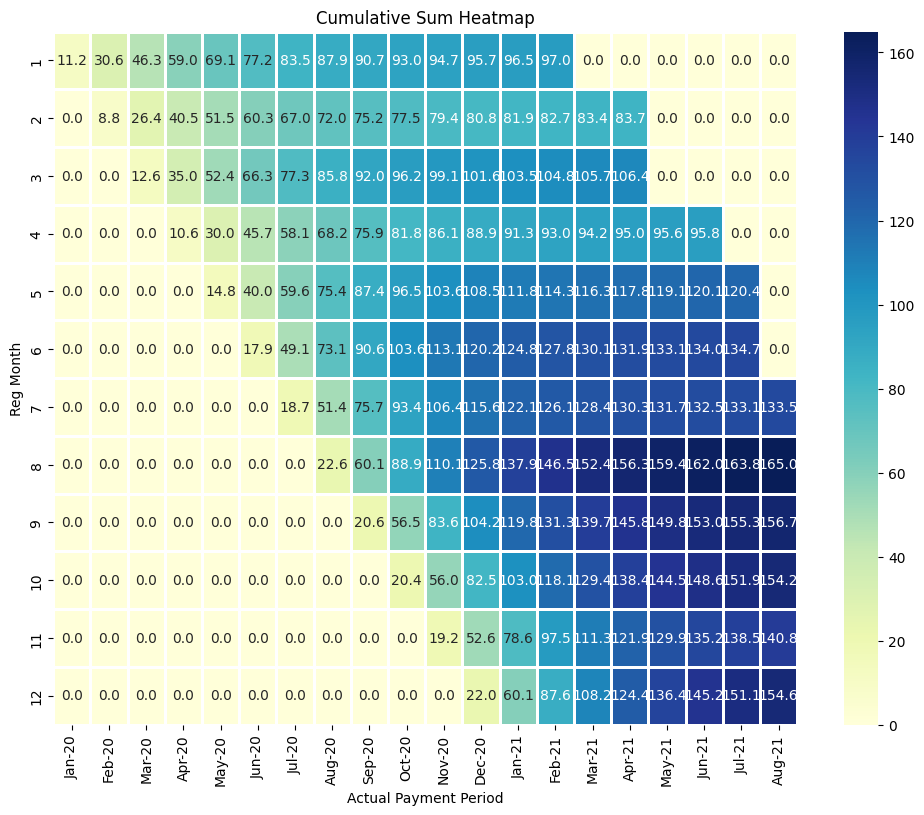

In [156]:
plt.figure(figsize=(12, 9))

sns.heatmap(final_piv,cmap="YlGnBu",   # Color scheme (Yellow-Green-Blue)
    annot=True,      # Display values in cells
    fmt=".1f",       # Format numbers with 1 decimal
    linewidths=0.8,  # Add space between cells
    cbar=True )

plt.xlabel("Actual Payment Period")
plt.ylabel("Reg Month")
plt.title("Cumulative Sum Heatmap")

# Show the plot
plt.show()